In [7]:
import graphviz
from datetime import datetime
import json
import numpy as np
import time

In [8]:
names = ['smallRandom','xsmallComplex','smallComplex','mediumRandom','MediumComplex','largeComplex','xlargeComplex','xxlargeComplex']
def create_path(names):
    paths = []
    for name in names : 
        path = './graphs/{}.json'.format(name)
        paths.append(path)
    return paths
paths = create_path(names)
print(paths[0])

./graphs/smallRandom.json


In [9]:
print(paths)

['./graphs/smallRandom.json', './graphs/xsmallComplex.json', './graphs/smallComplex.json', './graphs/mediumRandom.json', './graphs/MediumComplex.json', './graphs/largeComplex.json', './graphs/xlargeComplex.json', './graphs/xxlargeComplex.json']


In [10]:

with open('./graphs/mediumRandom.json', 'r') as f:
    data = json.load(f)

nodes = data['nodes']

In [11]:
def create_successors():
    ready_to_start = {}
    for node in nodes:
        nodes[node]['Successors']=[]
    for node in nodes :
        depend = nodes[node]['Dependencies']
        if len(depend)>0:
            for i in depend :
                nodes[str(i)]['Successors'].append(node)
        else :
            ready_to_start[node]=0
            # print(node)
    return ready_to_start

In [12]:
# create_successors()
# nodes

In [13]:
def weight(node):
    pt = node['Data'].split(':')
    time_s = float(pt[0])*3600 + float(pt[1])*60 + float(pt[2])
    return time_s

In [14]:
def add_ranks():
    for node in nodes:
        nodes[node]['rank'] = weight(nodes[node])
        nodes[node]['rank_calculated'] = False
        nodes[node]['finished'] = False

# for node in nodes.values() :
#     print(node['rank'])
#     print(node['rank_calculated'])

In [15]:
def calculate_rank(node):
    if not nodes[node]['rank_calculated']:
        succ = nodes[node]['Successors']     
        rank = weight(nodes[node])
        if len(succ) > 0:
            for i in succ:
                if not nodes[str(i)]['rank_calculated']:
                    # print("couldn't calculate rank")
                    return 1  
            weights = [nodes[str(i)]['rank'] for i in succ]
            # print('node weight:',rank)
            # print('successors:',succ)
            # print('succ weights:',weights)
            max_weights = max(weights)
            # print('max:',max_weights)
            rank += max_weights
        nodes[node]['rank'] = rank
        # print('calculated rank:', rank)
        nodes[node]['rank_calculated'] = True
    return 0

In [16]:
def graph_update():
    count = 0
    for node in reversed(nodes.keys()):
        # print('node:',node)
        count += calculate_rank(node)
    # print('not calculated ranks:',count)    
    return count

In [17]:
def calculate_ranks():
    epoch = 1
    count = 1
    while count > 0:
        # print('epoch:',epoch)
        count = graph_update()
        epoch+=1
    # print('rank calculation done')

In [18]:
def make_priority_list():
    node_list = []
    rank_list = []
    for node in nodes:
        node_list.append(node)
        rank_list.append(nodes[node]['rank'])

    # print(node_list)
    # print(rank_list)
    # indexes = np.flip(np.argsort(rank_list))
    # sorted_nodes = [node_list[i] for i in indexes]
    sorted_nodes = [x for _,x in sorted(zip(rank_list,node_list), reverse=True)]
    return sorted_nodes

In [19]:
def process_graph():
    ready_to_start = create_successors()
    add_ranks()
    calculate_ranks()
    priority_list = make_priority_list()
    return ready_to_start, priority_list
    

In [20]:
start_time = time.time()
ready_to_start, priority_list = process_graph()
duration = time.time() - start_time
# print(priority_list)
# print(len(nodes))
# print(len(priority_list))
print('duration:', duration)


duration: 0.01595592498779297


In [21]:
print(ready_to_start)
print(priority_list)

{'1': 0}
['1', '2', '3', '4', '5', '6', '7', '9', '11', '8', '13', '14', '15', '10', '16', '18', '12', '20', '23', '17', '21', '25', '19', '22', '24', '30', '26', '31', '33', '28', '27', '36', '39', '34', '29', '41', '42', '35', '44', '37', '45', '48', '38', '32', '40', '52', '47', '50', '51', '58', '46', '43', '53', '57', '63', '49', '60', '62', '55', '61', '54', '59', '64', '68', '56', '70', '74', '71', '66', '72', '65', '79', '78', '75', '76', '80', '69', '85', '83', '86', '77', '87', '73', '91', '89', '84', '81', '94', '93', '92', '88', '102', '82', '95', '101', '96', '99', '67', '106', '97', '98', '105', '109', '104', '108', '107', '112', '103', '111', '110', '116', '115', '90', '114', '117', '119', '100', '113', '118', '121', '123', '124', '122', '120', '128', '126', '125', '127', '129', '130', '134', '131', '132', '137', '136', '138', '135', '139', '133', '143', '144', '142', '145', '140', '147', '146', '141', '152', '148', '150', '149', '151', '156', '153', '161', '155', '157',

In [22]:
def calculate_execution_time(priority_list,n_cores):
    execution_times = [0]*n_cores
    for node in priority_list :
        task_time = weight(nodes[node])
        i = np.argmin(execution_times)
        execution_times[i] += task_time
    return execution_times

In [23]:
core_times = calculate_execution_time(priority_list,2)
print(core_times)
print(min(core_times))


[2022846.0548914992, 2021150.3819400012]
2021150.3819400012


In [24]:
times = []
priority_lists=[]
for path in paths :
    print('proccessing graph:', path)   
    with open(path, 'r') as f:
        data = json.load(f)
    nodes = data['nodes']
    start_time = time.time()
    priority_list = process_graph()
    end_time = time.time()
    print('duration :', end_time - start_time)
    priority_lists.append(priority_list)
    core_times = calculate_execution_time(priority_list,2)
    execution_time = min(core_times)
    print(execution_time)
    times.append(execution_time)
    del(nodes)

print(times)

    

proccessing graph: ./graphs/smallRandom.json
duration : 0.0


TypeError: unhashable type: 'dict'

In [ ]:
priority_lists

[['1', '2', '5', '4', '7', '8', '9', '6', '10', '3'],
 ['919',
  '927',
  '930',
  '931',
  '933',
  '934',
  '915',
  '917',
  '918',
  '920',
  '928',
  '929',
  '932',
  '516',
  '517',
  '518',
  '519',
  '520',
  '525',
  '526',
  '527',
  '521',
  '522',
  '523',
  '524',
  '947',
  '949',
  '957',
  '960',
  '956',
  '958',
  '959',
  '961',
  '954',
  '955',
  '966',
  '969',
  '972',
  '878',
  '880',
  '883',
  '886',
  '892',
  '893',
  '885',
  '887',
  '889',
  '890',
  '891',
  '881',
  '882',
  '884',
  '888',
  '900',
  '291',
  '292',
  '293',
  '294',
  '295',
  '300',
  '301',
  '302',
  '296',
  '297',
  '298',
  '299',
  '1111',
  '1113',
  '1117',
  '1123',
  '1129',
  '1132',
  '1115',
  '1116',
  '1122',
  '1126',
  '1112',
  '1114',
  '1118',
  '1124',
  '1128',
  '1131',
  '1091',
  '1094',
  '1096',
  '1103',
  '1098',
  '1099',
  '1100',
  '1120',
  '544',
  '545',
  '580',
  '1127',
  '546',
  '581',
  '1092',
  '547',
  '1093',
  '1097',
  '548',
  '570',


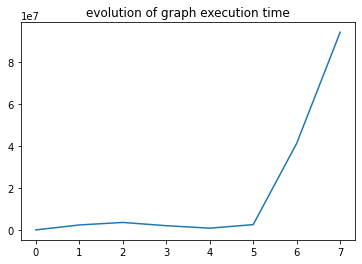

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('evolution of graph execution time')
plt.plot(times)


In [29]:
def make_empty_schedule(n_cores):
    schedule = {i:[{'node':'-1', 'start':0, 'end':0}] for i in range(n_cores)}
    return schedule

schedule = make_empty_schedule(2)
print(schedule)

{0: [{'node': '-1', 'start': 0, 'end': 0}], 1: [{'node': '-1', 'start': 0, 'end': 0}]}


In [30]:


def get_end_times():
    end_times = {core:schedule[core][-1]['end'] for core in schedule}
    return end_times

def update_ready_to_start(finished_task, task_end_time):
    nodes[finished_task]['finished'] = True
    for node in nodes[finished_task]['Successors']:
        dep_done = [nodes[dep]['finished'] for dep in nodes[node]['Dependencies']]
        if not (False in dep_done) :
            ready_to_start[node] = task_end_time

def gef_first_core_ready(end_times):
    end_times_copy = end_times.copy()
    ind = min(end_times_copy, key=end_times.get)
    finished_task = schedule[ind][-1]['node']
    task_end_time = end_times_copy.pop(ind)
    update_ready_to_start(finished_task, task_end_time)
    return ind, task_end_time, end_times_copy

def get_next_task():
    task = priority_list[0]

def try_assign_process(task, core, start_time):
    if task in ready_to_start and ready_to_start[task]<=start_time :
        end_time = start_time + weight(nodes[task])
        schedule[core].append({'node':task, 'start':start_time, 'end':end_time})
        ready_to_start.pop(task)
        if priority_list[0]==task :
            priority_list.pop(0)
        return True
    return False

def update_dead_time(dead_time, done, time_stamp, ind):
    dead_time_copy = dead_time.copy()
    if done :
        for core in dead_time_copy :
            dead_time_copy[core]['end'] = time_stamp
    else :
        dead_time_copy[ind]['idle'] = True
        dead_time_copy[ind]['start'] = time_stamp
    for core in dead_time_copy :
        dead_time_copy[core]['duration'] = dead_time_copy[core]['end'] - dead_time_copy[core]['start']
    return dead_time_copy

def fill_schedule(n_cores):
    dead_time = {i:{'idle':False, 'start':0, 'end':0, 'duration':0} for i in range(n_cores)}
    end_times = get_end_times(schedule)
    done = False
    while not done :
        ind, time_stamp, end_times = gef_first_core_ready(end_times)
        done = try_assign_process(ind, time_stamp)
        dead_time = update_dead_time(dead_time, done, time_stamp, ind)
    return dead_time

def fill_dead_time(dead_time):
    dead_time_copy = dead_time.copy()

    idle_cores = {core:dead_time[core]['start'] for core in dead_time if dead_time[core]['idle']}
    
    
    while len(idle_cores) > 0 :
        max_ind = max(idle_cores, key=idle_cores.get)
        end_time = dead_time_copy[max_ind]['end']
        core_available_start = dead_time_copy[max_ind]['start']
        possible_task = {}

        for task in ready_to_start :
            task_available_start = ready_to_start[task]
            start_time = max(core_available_start,task_available_start)
            if task_available_start<=end_time and weight(nodes[task])<= end_time - start_time :
                possible_task[task]=nodes[task]['rank']
        
        if len(possible_task)>0 :
            task_to_do = max(possible_task, key=possible_task.get)
            start_time = max(core_available_start,ready_to_start[task])
            try_assign_process(task, max_ind, start_time)
            dead_time_copy[max_ind]['start'] = start_time + weight(nodes[task])
        else :
            couldnt_find = True
    return couldnt_find, dead_time_copy
    

            


    


In [27]:
make_empty_schedule(2)

{0: [], 1: []}

In [ ]:
schedule = {'core1':{1:[start,end]},'core2':{}}
schedule = {'task1':{'core':1, 'start':start, 'end':end}}
def compute_start_end(node):
    dependencies_end = max([nodes[pred]['end'] for pred in nodes[node]['Dependencies']])
    for i in sorted(range(len(schedule)), key=lambda k: schedule[k]):
        if times[i]>dependencies_end :
            nodes[node]['core']=i
            nodes[node]['start'] = times[i]
            times[i] = nodes[node]['start'] + weight[nodes[node]]
            nodes[node]['end'] = times[i]
            return
        

